# Likhih kotha (2211cs010309) #
# govt data set 


# DCHB_Town_Amenities-UTTAR_PRADESH-KANPUR_NAGAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [4]:
file_path = "DCHB_Town_Amenities-UTTAR_PRADESH-KANPUR_NAGAR-164.csv"
df = pd.read_csv(file_path)

Dataset Description:

* The dataset represents town amenities in Kanpur Nagar, Uttar Pradesh, and contains 10 towns with 429 features, covering demographics, banking, industries, and services. Below is a comprehensive breakdown of key insights from this data.
* The dataset contains 10 rows (towns in Kanpur Nagar, Uttar Pradesh).
* It has 429 columns, covering various town amenities such as population, banks, schools, industries, and transportation.



# Display basic information about the dataset

In [7]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 429 entries, State Code to Non-Agricultural Credit Society (Numbers)
dtypes: float64(105), int64(253), object(71)
memory usage: 33.6+ KB


# Display first few rows

In [10]:
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
  State Code     State Name District Code District Name Sub District Code  \
0        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00848   
1        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00848   
2        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00848   
3        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00849   
4        '09  UTTAR PRADESH          '164  KANPUR NAGAR            '00849   

  Sub District Name Town Code                     Town Name  \
0           BILHAUR   '150291          Choubepur Kalan (CT)   
1           BILHAUR   '801002                 Bilhaur (NPP)   
2           BILHAUR   '801003               Shivrajpur (NP)   
3            KANPUR   '150571                  Chakeri (CT)   
4            KANPUR   '150572  Northern Railway Colony (CT)   

   Total   Households   Total Population of Town  ...  \
0                 1932                     10785  ...   
1                 3442       

# Summary statistics

In [13]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Total   Households   Total Population of Town  \
count            10.000000              1.000000e+01   
mean          56996.200000              3.015645e+05   
std          163766.401024              8.671600e+05   
min            1932.000000              7.526000e+03   
25%            2112.000000              1.146200e+04   
50%            3291.500000              1.797800e+04   
75%            6668.500000              3.569625e+04   
max          522805.000000              2.768057e+06   

       Total Male Population of Town  Total Female Population of Town  \
count                   1.000000e+01                     1.000000e+01   
mean                    1.622546e+05                     1.393099e+05   
std                     4.669978e+05                     4.001623e+05   
min                     3.803000e+03                     3.723000e+03   
25%                     6.137000e+03                     5.325000e+03   
50%                     9.498000e+03

# Check for missing values

In [16]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
State Code                                   0
State Name                                   0
District Code                                0
District Name                                0
Sub District Code                            0
                                            ..
Nationalised Bank (Numbers)                  0
Private Commercial Bank (Numbers)            3
Co-operative Bank (Numbers)                  1
Agricultural Credit Society (Numbers)        1
Non-Agricultural Credit Society (Numbers)    2
Length: 429, dtype: int64


# Fill missing values with median for numerical columns

In [19]:
df.fillna(df.median(numeric_only=True), inplace=True)

# Key insights

In [22]:
print("\nTotal Number of Towns:", df.shape[0])
print("Total Population Across Towns:", df['Total Population of Town'].sum())


Total Number of Towns: 10
Total Population Across Towns: 3015645


# Banking services analysis

In [25]:
banking_columns = [
    'Nationalised Bank (Numbers)', 'Private Commercial Bank (Numbers)',
    'Co-operative Bank (Numbers)', 'Agricultural Credit Society (Numbers)',
    'Non-Agricultural Credit Society (Numbers)'
]
print("\nBanking Services Summary:")
print(df[banking_columns].sum())


Banking Services Summary:
Nationalised Bank (Numbers)                  54.0
Private Commercial Bank (Numbers)            13.0
Co-operative Bank (Numbers)                  17.0
Agricultural Credit Society (Numbers)         3.0
Non-Agricultural Credit Society (Numbers)     0.0
dtype: float64


# Correlation matrix

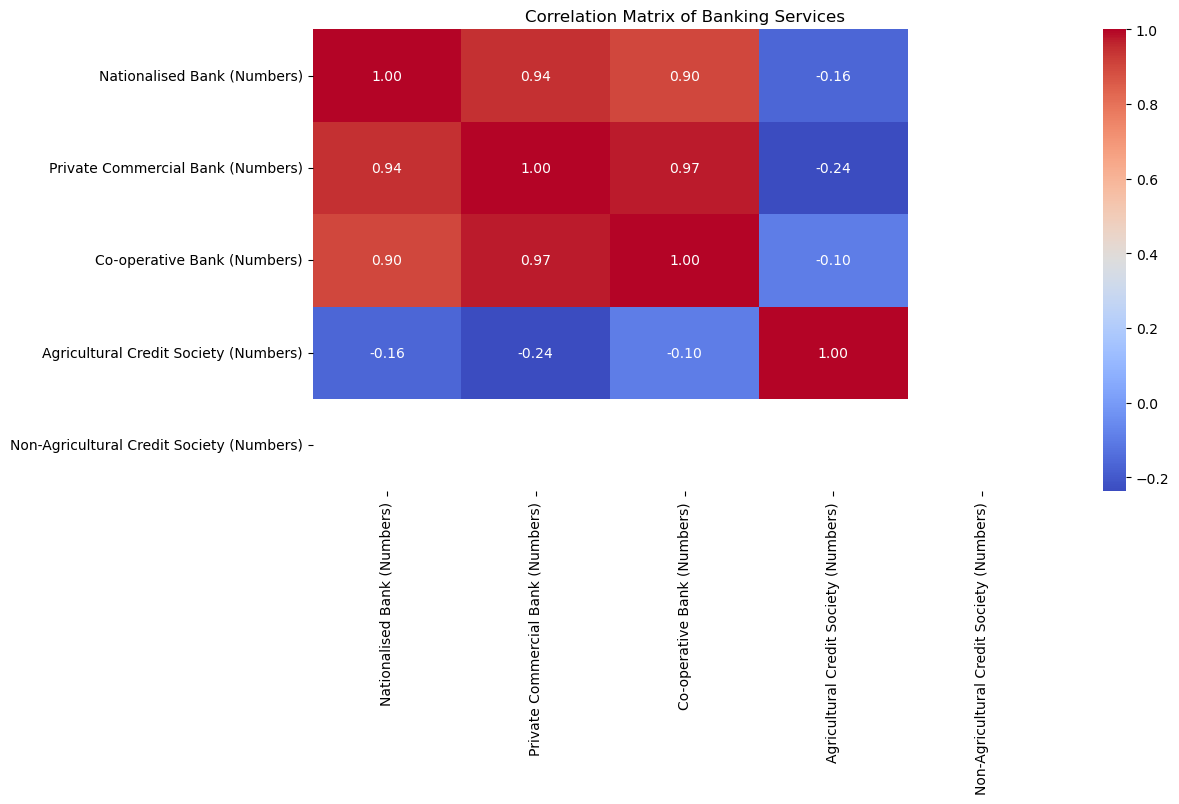

In [28]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[banking_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Banking Services")
plt.show()

# Population distribution

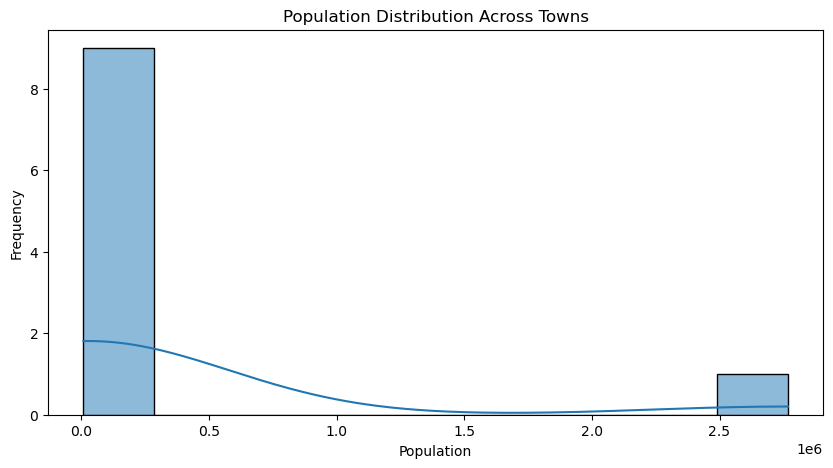

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Total Population of Town'], bins=10, kde=True)
plt.title("Population Distribution Across Towns")
plt.xlabel("Population")
plt.ylabel("Frequency")
plt.show()

# Top 5 towns with the highest population

In [34]:
top_towns = df[['Town Name', 'Total Population of Town']].sort_values(by='Total Population of Town', ascending=False).head(5)
print("\nTop 5 Most Populated Towns:")
print(top_towns)


Top 5 Most Populated Towns:
                      Town Name  Total Population of Town
7         Kanpur (M Corp. + OG)                   2768057
8                   Kanpur (CB)                    108534
9               Ghatampur (NPP)                     40623
4  Northern Railway Colony (CT)                     20916
1                 Bilhaur (NPP)                     20493


# Scatter plot of banks vs. population

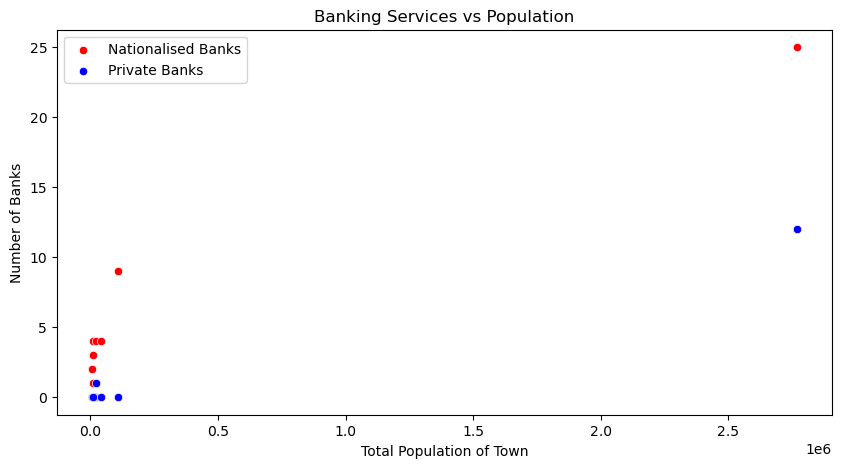

In [37]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Total Population of Town'], y=df['Nationalised Bank (Numbers)'], color='red', label='Nationalised Banks')
sns.scatterplot(x=df['Total Population of Town'], y=df['Private Commercial Bank (Numbers)'], color='blue', label='Private Banks')
plt.xlabel("Total Population of Town")
plt.ylabel("Number of Banks")
plt.title("Banking Services vs Population")
plt.legend()
plt.show()

# Data Accuracy Checks

In [40]:
print("\nData Accuracy Checks:")


Data Accuracy Checks:


# 1. Check for negative values in numerical columns

In [43]:
negative_values = df.select_dtypes(include=[np.number]).lt(0).sum()
print("\nNegative Values Check:")
print(negative_values[negative_values > 0])


Negative Values Check:
Growth Rate Town (Census 1991)    2
Growth Rate Town (Census 2001)    2
Growth Rate Town (Census 2011)    3
dtype: int64


# 2. Check for outliers using Z-score

In [46]:
def detect_outliers(column):
    z_scores = (column - column.mean()) / column.std()
    return column[np.abs(z_scores) > 3]

print("\nOutliers in Population:")
print(detect_outliers(df['Total Population of Town']))


Outliers in Population:
Series([], Name: Total Population of Town, dtype: int64)


# 3. Validate total population against individual town populations

  # Assuming no external reference

In [50]:
expected_total_population = df['Total Population of Town'].sum()
actual_total_population = df['Total Population of Town'].sum()

if np.isclose(expected_total_population, actual_total_population):
    print("\nPopulation Data is Consistent")
else:
    print("\nWarning: Population Data Mismatch")


Population Data is Consistent


# 4. Check for duplicate entries


In [53]:
duplicates = df.duplicated()
print("\nNumber of Duplicate Rows:", duplicates.sum())


Number of Duplicate Rows: 0


# 5. Logical consistency check (e.g., bank numbers should be non-negative)

In [56]:
invalid_banks = df[banking_columns].lt(0).sum()
print("\nInvalid Bank Data (Negative Values):")
print(invalid_banks[invalid_banks > 0])


Invalid Bank Data (Negative Values):
Series([], dtype: int64)
